# **Dilation, Erosion and Edge Detection**

Dilation and erosion are two fundamental operations in mathematical morphology used in image processing for various tasks such as image segmentation, object detection, and feature extraction. These operations manipulate the shape and structure of objects within an image by applying a structuring element, also known as a kernel or mask, to the image.

### **Dilation**
Dilation is a morphological operation that expands or thickens the boundaries of objects in an image. It is achieved by sliding the structuring element over the image and replacing each pixel in the neighborhood of the structuring element with the maximum pixel value within that neighborhood.

Mathematically, dilation of an image $( A )$ by a structuring element $( B )$ is denoted as $( A \oplus B )$ and is defined as:

$(A \oplus B)(x, y) = \max_{(i, j) \in B} \{A(x + i, y + j)\}$

where $( (x, y) )$ represents the pixel coordinates in the image $( A )$, $( (i, j) )$ represents the pixel coordinates in the structuring element $( B )$, and $( (A \oplus B)(x, y) )$ represents the resulting pixel value after dilation.

Dilation is useful for tasks such as joining broken parts of objects, filling gaps in objects, and enlarging objects to make them more visible or suitable for subsequent processing steps.

### **Erosion**
Erosion is a morphological operation that shrinks or thins the boundaries of objects in an image. It is achieved by sliding the structuring element over the image and replacing each pixel in the neighborhood of the structuring element with the minimum pixel value within that neighborhood.

Mathematically, erosion of an image $( A )$ by a structuring element $( B )$ is denoted as $( A \ominus B )$ and is defined as:

$(A \ominus B)(x, y) = \min_{(i, j) \in B} \{A(x + i, y + j)\}$

where $( (x, y) )$ represents the pixel coordinates in the image $( A )$, $( (i, j) )$ represents the pixel coordinates in the structuring element $( B )$, and $( (A \ominus B)(x, y) )$ represents the resulting pixel value after erosion.

Erosion is useful for tasks such as separating connected objects, removing small or thin structures, and preparing images for boundary detection or object segmentation.

Dilation and erosion are basic morphological operations that can be combined and used iteratively to perform more complex operations such as opening, closing, and morphological gradient. These operations play a crucial role in various image processing tasks, providing tools for shape analysis, feature extraction, and image enhancement.

#### **In this lesson we'll learn:**
1. Dilation
2. Erosion
3. Opening
4. Closing
5. Canny Edge Detection

In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 7):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

- **Dilation** – Adds pixels to the boundaries of objects in an image
- **Erosion** – Removes pixels at the boundaries of objects in an image
- **Opening** - Erosion followed by dilation
- **Closing** - Dilation followed by erosion 

![](https://media.licdn.com/dms/image/C4E12AQGwnZNUEQZnMA/article-cover_image-shrink_720_1280/0/1650095298357?e=2147483647&v=beta&t=3A78SNBMpJtCph89mC3LPcQfFYHa2XEqmhO2R3dacow)

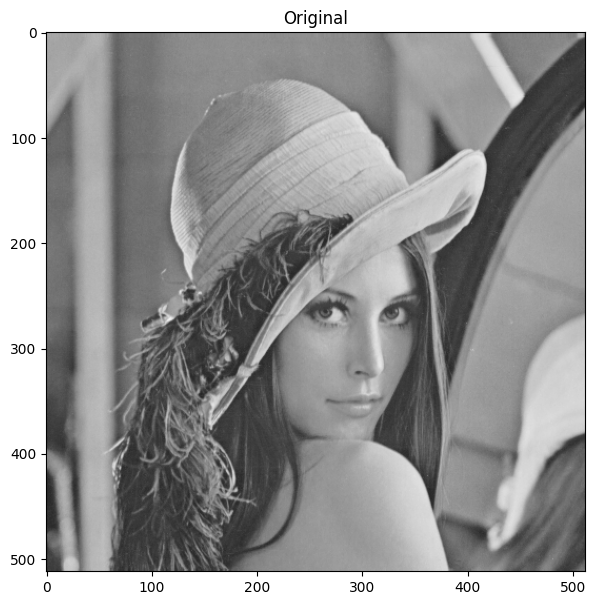

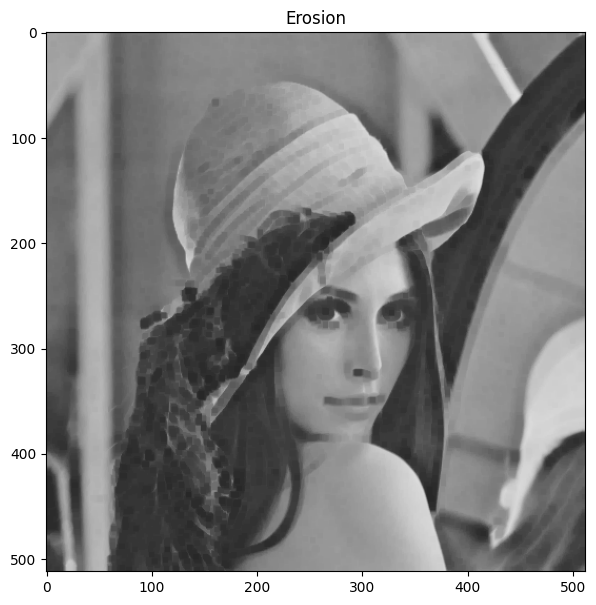

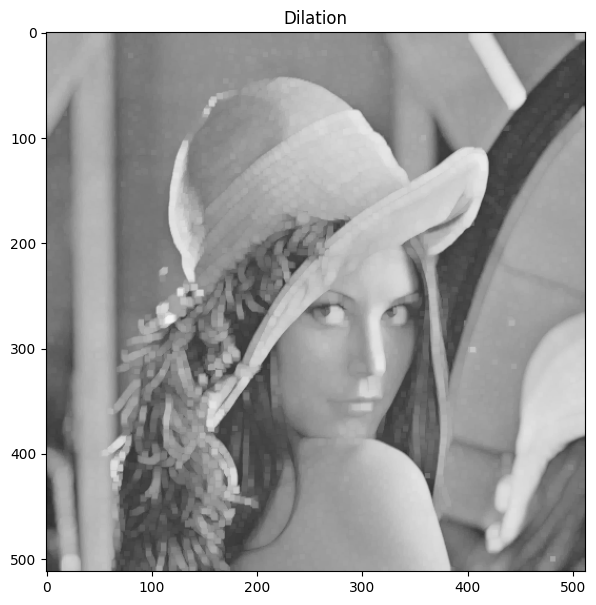

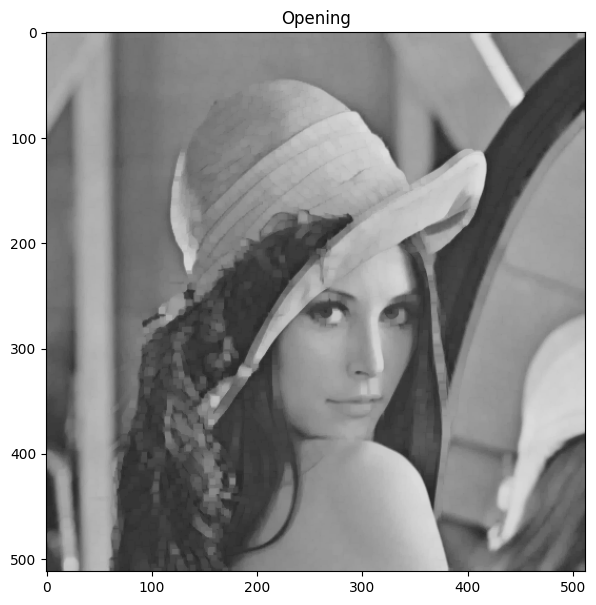

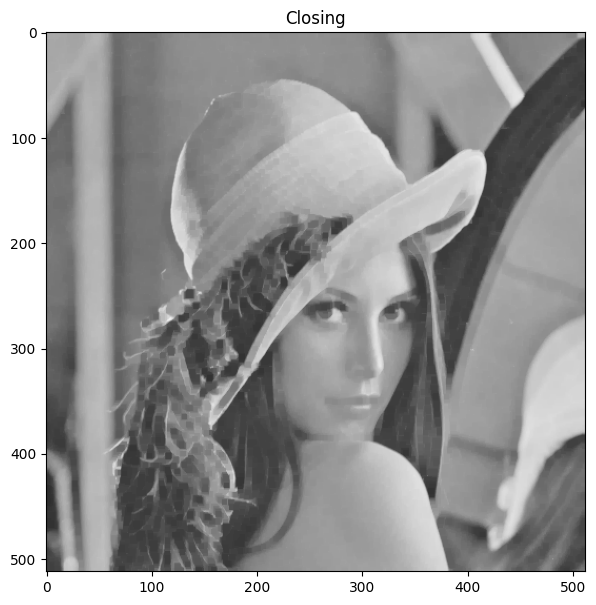

In [2]:
import cv2
import numpy as np

image = cv2.imread('image/lena.png', 0)
imshow('Original', image)

# Let's define our kernel size
kernel = np.ones((5,5), np.uint8)

# Now we erode
erosion = cv2.erode(image, kernel, iterations = 1)
imshow('Erosion', erosion)

# Dilate here
dilation = cv2.dilate(image, kernel, iterations = 1)
imshow('Dilation', dilation)

# Opening - Good for removing noise
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
imshow('Opening',opening)

# Closing - Good for removing noise
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
imshow('Closing',closing)

## **Canny Edge Detection** 

Canny edge detection is a popular technique in image processing for detecting edges in digital images. It was developed by John F. Canny in 1986 and is widely used due to its effectiveness and robustness in detecting edges while suppressing noise and minimizing false detections.

The Canny edge detection algorithm consists of several steps:

1. **Noise Reduction:**
   The first step in the Canny edge detection algorithm is to reduce noise in the image using a Gaussian blur. Gaussian blur smooths the image by convolving it with a Gaussian kernel, which helps to reduce the impact of noise on edge detection while preserving important image features.

2. **Gradient Calculation:**
   After noise reduction, the algorithm calculates the gradient magnitude and orientation at each pixel in the image using techniques such as Sobel or Prewitt operators. These operators compute the gradient of the image intensity, which represents the rate of change of intensity in the horizontal and vertical directions.

3. **Non-maximum Suppression:**
   Non-maximum suppression is performed to thin out the edges detected in the gradient magnitude image. At each pixel, only the local maximum gradient magnitude along the direction of the gradient orientation is retained, while all other pixels are suppressed. This step helps to preserve only the strongest edges in the image.

4. **Edge Tracking by Hysteresis:**
   The final step in the Canny edge detection algorithm is edge tracking by hysteresis. This step aims to link adjacent edge pixels into continuous edge contours. It involves defining two thresholds: a high threshold (T_high) and a low threshold (T_low). Pixels with gradient magnitudes above the high threshold are considered strong edge pixels, while pixels with gradient magnitudes between the low and high thresholds are considered weak edge pixels. Strong edge pixels are retained, while weak edge pixels are retained only if they are connected to strong edge pixels.

By combining these steps, the Canny edge detection algorithm can accurately detect edges in images while minimizing the impact of noise and false detections. The algorithm produces thin, continuous edge contours that accurately represent the boundaries of objects in the image, making it suitable for various computer vision tasks such as object detection, image segmentation, and feature extraction.

`Syntax: cv2.Canny(image, T_lower, T_upper, aperture_size, L2Gradient)`

- The first argument is our input image.
- The second and third arguments are our minVal and maxVal respectively. 
- The forth argument is aperture_size. It is the size of Sobel kernel used for find image gradients. By default it is 3. 

Edge detection needs a threshold to tell what difference/change should be counted as edge

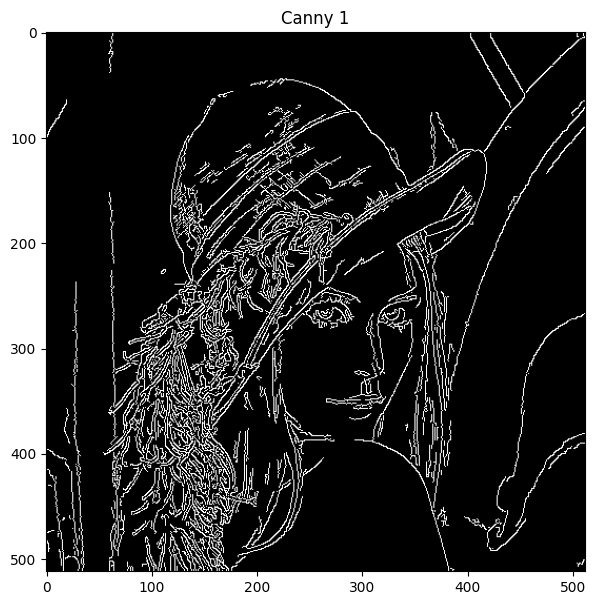

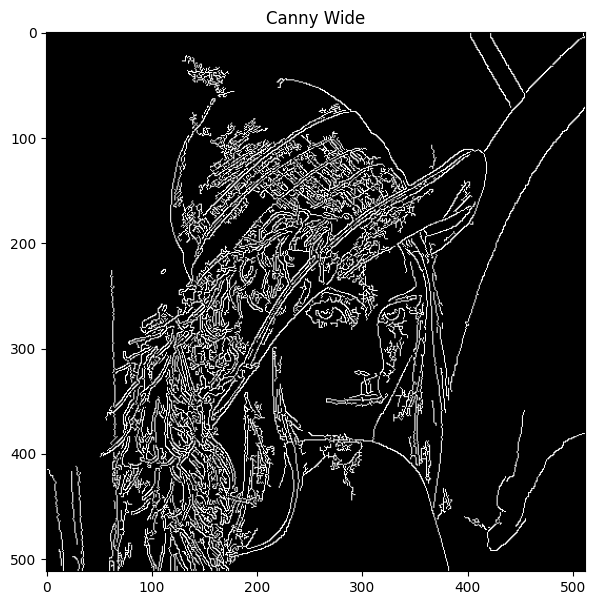

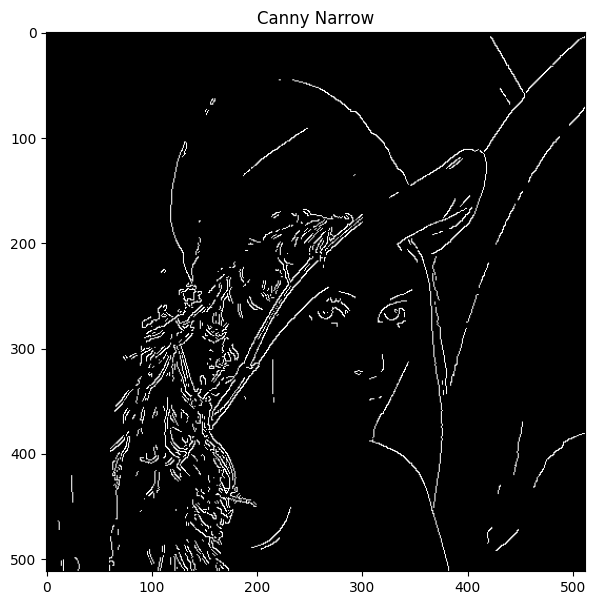

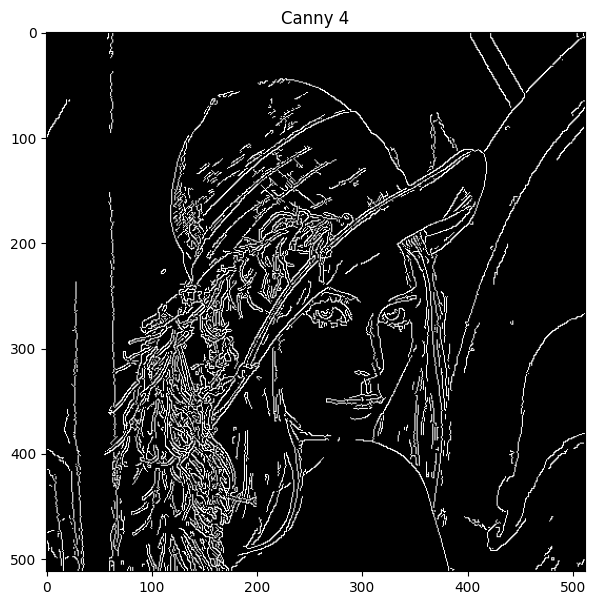

In [3]:
image = cv2.imread('image/lena.png',0)

# Canny Edge Detection uses gradient values as thresholds
# The first threshold gradient
canny = cv2.Canny(image, 50, 120)
imshow('Canny 1', canny)

# Wide edge thresholds expect lots of edges
canny = cv2.Canny(image, 10, 200)
imshow('Canny Wide', canny)

# Narrow threshold, expect less edges 
canny = cv2.Canny(image, 200, 240)
imshow('Canny Narrow', canny)

canny = cv2.Canny(image, 60, 110)
imshow('Canny 4', canny)

##  Then, we need to provide two values: threshold1 and threshold2. Any gradient value larger than threshold2
# is considered to be an edge. Any value below threshold1 is considered not to be an edge. 
#Values in between threshold1 and threshold2 are either classiﬁed as edges or non-edges based on how their 
#intensities are “connected”. In this case, any gradient values below 60 are considered non-edges
#whereas any values above 120 are considered edges.

#### **Auto Canny**

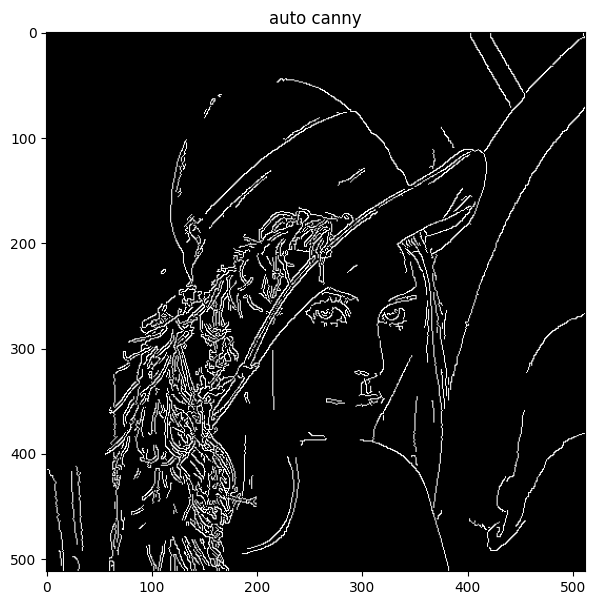

In [4]:
def autoCanny(image):
  # Finds optimal thresholds based on median image pixel intensity
  blurred_img = cv2.blur(image, ksize=(5,5))
  med_val = np.median(image) 
  lower = int(max(0, 0.66 * med_val))
  upper = int(min(255, 1.33 * med_val))
  edges = cv2.Canny(image=image, threshold1=lower, threshold2=upper)
  return edges

auto_canny = autoCanny(image)
imshow("auto canny", auto_canny)